In [171]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import pandas as pd
import numpy as np
import tensorflow as tf

In [172]:
df = pd.read_csv('../data/iris.csv', names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]) 
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [174]:
dataset = df.values
dataset
X = dataset[:,0:4]
Y = dataset[:,4]
X=np.asanyarray(X).astype(np.float32)
from sklearn.preprocessing import LabelEncoder
e = LabelEncoder()
e.fit(Y)
Y = e.transform(Y)
from keras.utils.np_utils import to_categorical
Y = tf.keras.utils.to_categorical(Y)

In [175]:
from sklearn.model_selection import train_test_split
# 학습셋과 테스트셋의 구분
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [176]:
Y_train

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1

In [177]:
# 모델의 설정
model = Sequential()
model.add(Dense(20, input_dim=4, activation='relu'))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [178]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 20)                100       
_________________________________________________________________
dense_35 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_36 (Dense)             (None, 3)                 33        
Total params: 343
Trainable params: 343
Non-trainable params: 0
_________________________________________________________________


In [179]:
import os
# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [180]:
 # 모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [181]:
history =model.fit(X_train, Y_train,
                   validation_split=0.2, 
                   epochs=500, 
                   batch_size=1,
                   verbose=0,
                   callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 1.11227, saving model to ./model/01-1.1123.hdf5

Epoch 00002: val_loss improved from 1.11227 to 0.95731, saving model to ./model/02-0.9573.hdf5

Epoch 00003: val_loss improved from 0.95731 to 0.79245, saving model to ./model/03-0.7925.hdf5

Epoch 00004: val_loss improved from 0.79245 to 0.70090, saving model to ./model/04-0.7009.hdf5

Epoch 00005: val_loss improved from 0.70090 to 0.62610, saving model to ./model/05-0.6261.hdf5

Epoch 00006: val_loss improved from 0.62610 to 0.54831, saving model to ./model/06-0.5483.hdf5

Epoch 00007: val_loss improved from 0.54831 to 0.47437, saving model to ./model/07-0.4744.hdf5

Epoch 00008: val_loss improved from 0.47437 to 0.45731, saving model to ./model/08-0.4573.hdf5

Epoch 00009: val_loss improved from 0.45731 to 0.37114, saving model to ./model/09-0.3711.hdf5

Epoch 00010: val_loss improved from 0.37114 to 0.36158, saving model to ./model/10-0.3616.hdf5

Epoch 00011: val_loss improved from 0.36158


Epoch 00136: val_loss did not improve from 0.01921

Epoch 00137: val_loss did not improve from 0.01921

Epoch 00138: val_loss did not improve from 0.01921

Epoch 00139: val_loss did not improve from 0.01921

Epoch 00140: val_loss did not improve from 0.01921

Epoch 00141: val_loss did not improve from 0.01921

Epoch 00142: val_loss did not improve from 0.01921

Epoch 00143: val_loss did not improve from 0.01921

Epoch 00144: val_loss did not improve from 0.01921

Epoch 00145: val_loss did not improve from 0.01921

Epoch 00146: val_loss did not improve from 0.01921

Epoch 00147: val_loss did not improve from 0.01921

Epoch 00148: val_loss did not improve from 0.01921

Epoch 00149: val_loss did not improve from 0.01921

Epoch 00150: val_loss did not improve from 0.01921

Epoch 00151: val_loss did not improve from 0.01921

Epoch 00152: val_loss did not improve from 0.01921

Epoch 00153: val_loss did not improve from 0.01921

Epoch 00154: val_loss did not improve from 0.01921

Epoch 00155

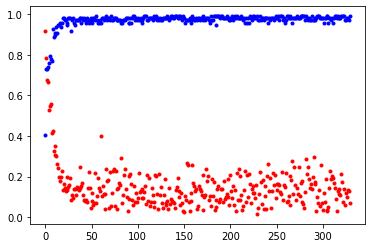

In [158]:
import matplotlib.pyplot as plt
y_vloss=history.history['val_loss']
y_acc=history.history['accuracy']
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

In [169]:
from keras.models import load_model  
model = load_model('./model/230-0.0159.hdf5')
# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

1/1 [==============================] - 0s 0s/step - loss: 0.0476 - accuracy: 0.9667

 Accuracy: 0.9667


In [161]:
# 모델의 설정
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [184]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_33 (Dense)             (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [162]:
import os
# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [163]:
# 모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

history =model.fit(X_train, Y_train,
                   validation_split=0.2, 
                   epochs=500, 
                   batch_size=1,
                   verbose=0,
                   callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 1.08442, saving model to ./model/01-1.0844.hdf5

Epoch 00002: val_loss improved from 1.08442 to 0.97179, saving model to ./model/02-0.9718.hdf5

Epoch 00003: val_loss improved from 0.97179 to 0.90487, saving model to ./model/03-0.9049.hdf5

Epoch 00004: val_loss improved from 0.90487 to 0.85003, saving model to ./model/04-0.8500.hdf5

Epoch 00005: val_loss improved from 0.85003 to 0.75067, saving model to ./model/05-0.7507.hdf5

Epoch 00006: val_loss improved from 0.75067 to 0.74130, saving model to ./model/06-0.7413.hdf5

Epoch 00007: val_loss improved from 0.74130 to 0.65011, saving model to ./model/07-0.6501.hdf5

Epoch 00008: val_loss improved from 0.65011 to 0.64076, saving model to ./model/08-0.6408.hdf5

Epoch 00009: val_loss improved from 0.64076 to 0.56126, saving model to ./model/09-0.5613.hdf5

Epoch 00010: val_loss did not improve from 0.56126

Epoch 00011: val_loss did not improve from 0.56126

Epoch 00012: val_loss improved from


Epoch 00130: val_loss did not improve from 0.07404

Epoch 00131: val_loss did not improve from 0.07404

Epoch 00132: val_loss did not improve from 0.07404

Epoch 00133: val_loss did not improve from 0.07404

Epoch 00134: val_loss did not improve from 0.07404

Epoch 00135: val_loss did not improve from 0.07404

Epoch 00136: val_loss did not improve from 0.07404

Epoch 00137: val_loss did not improve from 0.07404

Epoch 00138: val_loss improved from 0.07404 to 0.06536, saving model to ./model/138-0.0654.hdf5

Epoch 00139: val_loss did not improve from 0.06536

Epoch 00140: val_loss did not improve from 0.06536

Epoch 00141: val_loss did not improve from 0.06536

Epoch 00142: val_loss did not improve from 0.06536

Epoch 00143: val_loss did not improve from 0.06536

Epoch 00144: val_loss did not improve from 0.06536

Epoch 00145: val_loss did not improve from 0.06536

Epoch 00146: val_loss did not improve from 0.06536

Epoch 00147: val_loss did not improve from 0.06536

Epoch 00148: val_l


Epoch 00285: val_loss did not improve from 0.05422

Epoch 00286: val_loss did not improve from 0.05422

Epoch 00287: val_loss did not improve from 0.05422

Epoch 00288: val_loss did not improve from 0.05422

Epoch 00289: val_loss did not improve from 0.05422

Epoch 00290: val_loss did not improve from 0.05422

Epoch 00291: val_loss did not improve from 0.05422

Epoch 00292: val_loss did not improve from 0.05422

Epoch 00293: val_loss did not improve from 0.05422

Epoch 00294: val_loss did not improve from 0.05422

Epoch 00295: val_loss did not improve from 0.05422

Epoch 00296: val_loss did not improve from 0.05422

Epoch 00297: val_loss did not improve from 0.05422

Epoch 00298: val_loss did not improve from 0.05422

Epoch 00299: val_loss did not improve from 0.05422

Epoch 00300: val_loss did not improve from 0.05422

Epoch 00301: val_loss did not improve from 0.05422

Epoch 00302: val_loss did not improve from 0.05422

Epoch 00303: val_loss did not improve from 0.05422

Epoch 00304


Epoch 00440: val_loss did not improve from 0.03888

Epoch 00441: val_loss did not improve from 0.03888

Epoch 00442: val_loss did not improve from 0.03888

Epoch 00443: val_loss did not improve from 0.03888

Epoch 00444: val_loss did not improve from 0.03888

Epoch 00445: val_loss did not improve from 0.03888

Epoch 00446: val_loss did not improve from 0.03888

Epoch 00447: val_loss did not improve from 0.03888


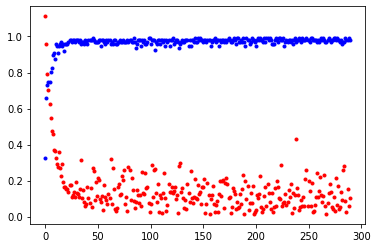

In [182]:
import matplotlib.pyplot as plt
y_vloss=history.history['val_loss']
y_acc=history.history['accuracy']
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

In [183]:
model = load_model('./model/347-0.0389.hdf5')
# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

1/1 [==============================] - 0s 1ms/step - loss: 0.0270 - accuracy: 1.0000

 Accuracy: 1.0000


In [185]:
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [186]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_38 (Dense)             (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [196]:
import os
# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [197]:
# 모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

history =model.fit(X_train, Y_train,
                   validation_split=0.2, 
                   epochs=500, 
                   batch_size=1,
                   verbose=0,
                   callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 1.83742, saving model to ./model/01-1.8374.hdf5

Epoch 00002: val_loss improved from 1.83742 to 1.33186, saving model to ./model/02-1.3319.hdf5

Epoch 00003: val_loss improved from 1.33186 to 1.06136, saving model to ./model/03-1.0614.hdf5

Epoch 00004: val_loss improved from 1.06136 to 1.04127, saving model to ./model/04-1.0413.hdf5

Epoch 00005: val_loss improved from 1.04127 to 0.99545, saving model to ./model/05-0.9954.hdf5

Epoch 00006: val_loss improved from 0.99545 to 0.98343, saving model to ./model/06-0.9834.hdf5

Epoch 00007: val_loss improved from 0.98343 to 0.91012, saving model to ./model/07-0.9101.hdf5

Epoch 00008: val_loss improved from 0.91012 to 0.90772, saving model to ./model/08-0.9077.hdf5

Epoch 00009: val_loss improved from 0.90772 to 0.85646, saving model to ./model/09-0.8565.hdf5

Epoch 00010: val_loss improved from 0.85646 to 0.84099, saving model to ./model/10-0.8410.hdf5

Epoch 00011: val_loss improved from 0.84099


Epoch 00115: val_loss did not improve from 0.17481

Epoch 00116: val_loss did not improve from 0.17481

Epoch 00117: val_loss did not improve from 0.17481

Epoch 00118: val_loss did not improve from 0.17481

Epoch 00119: val_loss improved from 0.17481 to 0.16178, saving model to ./model/119-0.1618.hdf5

Epoch 00120: val_loss did not improve from 0.16178

Epoch 00121: val_loss did not improve from 0.16178

Epoch 00122: val_loss improved from 0.16178 to 0.15853, saving model to ./model/122-0.1585.hdf5

Epoch 00123: val_loss did not improve from 0.15853

Epoch 00124: val_loss improved from 0.15853 to 0.15779, saving model to ./model/124-0.1578.hdf5

Epoch 00125: val_loss did not improve from 0.15779

Epoch 00126: val_loss did not improve from 0.15779

Epoch 00127: val_loss improved from 0.15779 to 0.14933, saving model to ./model/127-0.1493.hdf5

Epoch 00128: val_loss did not improve from 0.14933

Epoch 00129: val_loss did not improve from 0.14933

Epoch 00130: val_loss did not improve f


Epoch 00261: val_loss did not improve from 0.09102

Epoch 00262: val_loss did not improve from 0.09102

Epoch 00263: val_loss did not improve from 0.09102

Epoch 00264: val_loss did not improve from 0.09102

Epoch 00265: val_loss did not improve from 0.09102

Epoch 00266: val_loss did not improve from 0.09102

Epoch 00267: val_loss improved from 0.09102 to 0.08052, saving model to ./model/267-0.0805.hdf5

Epoch 00268: val_loss did not improve from 0.08052

Epoch 00269: val_loss did not improve from 0.08052

Epoch 00270: val_loss did not improve from 0.08052

Epoch 00271: val_loss did not improve from 0.08052

Epoch 00272: val_loss did not improve from 0.08052

Epoch 00273: val_loss did not improve from 0.08052

Epoch 00274: val_loss did not improve from 0.08052

Epoch 00275: val_loss did not improve from 0.08052

Epoch 00276: val_loss did not improve from 0.08052

Epoch 00277: val_loss did not improve from 0.08052

Epoch 00278: val_loss did not improve from 0.08052

Epoch 00279: val_l

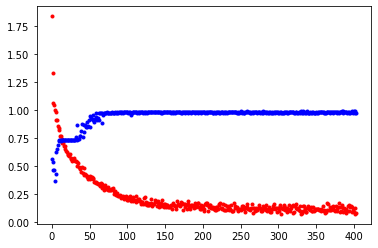

In [198]:
import matplotlib.pyplot as plt
y_vloss=history.history['val_loss']
y_acc=history.history['accuracy']
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

In [199]:
model = load_model('./model/304-0.0697.hdf5')
# 결과 출력
print("\n Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

1/1 [==============================] - 0s 993us/step - loss: 0.0339 - accuracy: 1.0000

 Accuracy: 1.0000


In [270]:
l_model = load_model('./model/304-0.0697.hdf5')

In [271]:
new_test = np.array([[5,2.6,1,0.2],[7.7,2.8,6.7,2]])
new_test

array([[5. , 2.6, 1. , 0.2],
       [7.7, 2.8, 6.7, 2. ]])

In [272]:
Y_pred = l_model.predict(new_test)

In [273]:
tg = ['setosa','versicolor','virginica']

In [274]:
Y_pred_df = pd.DataFrame(Y_pred)

In [279]:
Y_pred_df

,0,1,2
0,9.999616e-01,0.000038,1.196996e-12
1,1.014796e-21,0.001658,9.983423e-01


In [281]:
Y_pred_df['rs'] = Y_pred_df.apply(lambda x : [ 1 if val == np.max(x) else 0 for idx,val in enumerate(x)] ,axis=1)

In [282]:
Y_pred_df

,0,1,2,rs
0,9.999616e-01,0.000038,1.196996e-12,"[1, 0, 0]"
1,1.014796e-21,0.001658,9.983423e-01,"[0, 0, 1]"


In [267]:
Y_pred_df['rs'] = Y_pred_df['rs'].apply(lambda x : tg[0] if str(x) == '[1, 0, 0]' else (tg[1] if str(x) == '[0, 1, 0]' else tg[2]))

In [268]:
Y_pred_df

,0,1,2,rs
0,9.999616e-01,0.000038,1.196996e-12,setosa
1,1.014796e-21,0.001658,9.983423e-01,virginica
